<a href="https://colab.research.google.com/github/sagudelom06/Clase-1-Ciencia-de-los-datos/blob/master/An%C3%A1lisis_de_datos_usando_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este tutorial se presenta el análisis de una base de datos sobre vuelos usando Pndas. En este documento se ejemplifica el uso de DataFrames para la realización de consultas usando sus funciones nativas.

In [0]:

## importa la librería
import pandas as pd
import numpy as np
pd.set_option('display.notebook_repr_html', True)

In [0]:
##
## Crea un DataFrame a partir del archivo fligths.csv
##
flights = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/to-do/flights.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

In [4]:
##
## Se imprime el esquema para verificar la lectura
## del archivo.
##
flights.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,100000.0,100000.0,100000.000000,100000.000000,98858.000000,100000.000000,98698.000000,100000.000000,100000.000000,98698.000000,100000.000000,98698.000000,98698.000000,98858.000000,100000.000000,98698.000000,98858.000000,100000.000000,100000.000000,19629.000000,19629.000000,19629.000000,19629.000000,19629.000000
mean,2008.0,1.0,17.087860,3.890040,1355.200722,1341.989400,1492.739225,1502.601540,1510.648540,107.558502,111.989540,91.863797,5.729954,10.379049,630.586320,4.768962,10.927765,0.011420,0.001600,9.573488,2.036120,8.353151,0.110805,29.343675
std,0.0,0.0,8.356364,1.952999,464.089632,451.356984,496.376794,478.100216,1186.128598,55.350971,57.209135,54.208224,30.966959,28.384428,437.357075,2.983635,5.989580,0.106253,0.039968,21.836836,13.815868,18.826087,1.724888,39.753529
min,2008.0,1.0,1.000000,1.000000,1.000000,600.000000,1.000000,5.000000,1.000000,25.000000,17.000000,12.000000,-57.000000,-44.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.0,10.000000,2.000000,942.000000,940.000000,1114.000000,1120.000000,502.000000,68.000000,70.000000,53.000000,-9.000000,-2.000000,324.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2008.0,1.0,17.000000,4.000000,1344.000000,1335.000000,1518.000000,1520.000000,1320.000000,88.000000,90.000000,71.000000,-2.000000,1.000000,453.000000,4.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.000000
75%,2008.0,1.0,24.000000,5.000000,1743.000000,1730.000000,1913.000000,1910.000000,2362.000000,135.000000,145.000000,119.000000,10.000000,10.000000,843.000000,5.000000,12.000000,0.000000,0.000000,11.000000,0.000000,10.000000,0.000000,37.000000
max,2008.0,1.0,31.000000,7.000000,2359.000000,2235.000000,2400.000000,2355.000000,7676.000000,382.000000,370.000000,369.000000,500.000000,516.000000,2363.000000,213.000000,150.000000,1.000000,1.000000,431.000000,267.000000,366.000000,88.000000,434.000000


In [5]:
len(flights)

100000

In [8]:
#saco el numero de columnas del data frame, mirando el largo de la fila 1
flights.shape[1]

29

In [10]:
##
## Se imprime un subconjunto de las columnas para verificar
## la lectura
##
flights[['UniqueCarrier', 'FlightNum', 'DepDelay', 'ArrDelay', 'Distance']].head(5)

,UniqueCarrier,FlightNum,DepDelay,ArrDelay,Distance
0,WN,335,8.0,-14.0,810
1,WN,3231,19.0,2.0,810
2,WN,448,8.0,14.0,515
3,WN,1746,-4.0,-6.0,515
4,WN,3920,34.0,34.0,515


In [11]:

##
## Número total de registros leidos
##
numTotalFlights = len(flights)
numTotalFlights

100000

# Cálculos usando funciones de los DataFrames

**Cómputo del porcentaje de vuelos retrasados**

In [15]:
flights['DepDelay']>15

0        False
1         True
2        False
3        False
4         True
5         True
6         True
7        False
8        False
9        False
10       False
11        True
12       False
13       False
14       False
15       False
16        True
17       False
18        True
19        True
20       False
21        True
22        True
23       False
24       False
25        True
26        True
27        True
28       False
29       False
         ...  
99970    False
99971    False
99972    False
99973     True
99974    False
99975    False
99976     True
99977    False
99978    False
99979    False
99980    False
99981    False
99982    False
99983     True
99984    False
99985    False
99986    False
99987     True
99988     True
99989    False
99990    False
99991    False
99992    False
99993    False
99994    False
99995     True
99996    False
99997     True
99998     True
99999    False
Name: DepDelay, Length: 100000, dtype: bool

In [12]:

##
## La variable delayedFlights contiene las columnas UniqueCarrier y DepDelay
## para los vuelos con DepDelay > 15 minutos.
##
delayedFlights = flights[flights['DepDelay'] > 15][['UniqueCarrier', 'DepDelay']]
delayedFlights.head(5)

,UniqueCarrier,DepDelay
1,WN,19.0
4,WN,34.0
5,WN,25.0
6,WN,67.0
11,WN,94.0


In [16]:
##
## Porcentaje de vuelos retrasados.
##
numDelayedFlights = len(delayedFlights)
print("Porcentaje de vuelos retrasados: " + str(numDelayedFlights / numTotalFlights * 100) + "%")

Porcentaje de vuelos retrasados: 19.587%


# Creación de variables usando funciones de usuario

A continuación se desea crear una nueva columna llamada IsDelayed que vale 0 si el vuelo se realizó a tiempo y 1 si se retraso.

CREAMOS UNA COPIA DE LA TABLA ORIGINAL (FLIGHTS) Y LE AGREGAMOS LAS COLUMNAS NUEVAS(3)

.map - es para aplicar una funcion a cada elemento de una columna que halla seleccionado (isDelayed)

flightsWithDelays*['IsDelayed']* = flightsWithDelays*['IsDelayed']*.map(lambda x: 1 if x > 15 else 0)
flightsWithDelays*['IsDelayed']* = flightsWithDelays*['IsDelayed']*.map(lambda x: 0 if np.isnan(x) else x)

In [19]:
flightsWithDelays = flights[['Year',
                             'Month',
                             'DayofMonth',
                             'UniqueCarrier',
                             'FlightNum',
                             'DepDelay']].copy()

flightsWithDelays['IsDelayed'] =  flightsWithDelays['DepDelay'].copy()
flightsWithDelays['IsDelayed'] = flightsWithDelays['IsDelayed'].map(lambda x: 1 if x > 15 else 0)
#si es nan devuelvame o si no el val de x
flightsWithDelays['IsDelayed'] = flightsWithDelays['IsDelayed'].map(lambda x: 0 if np.isnan(x) else x)

flightsWithDelays[['DepDelay', 'IsDelayed']].head(10)

,DepDelay,IsDelayed
0,8.0,0
1,19.0,1
2,8.0,0
3,-4.0,0
4,34.0,1
5,25.0,1
6,67.0,1
7,-1.0,0
8,2.0,0
9,0.0,0


In [20]:
##
## A continuación, se calcula el porcentaje de vuelos con retrasos
##
flightsWithDelays.IsDelayed.sum() / flightsWithDelays.DepDelay.count()

0.19813267515021546

In [24]:
##
## Retrasos por transportador
##
%matplotlib inline
#flights['IsDelayed'] = flights['DepDelay'].copy()
#flights['IsDelayed'] = flights['IsDelayed'].map(lambda x: 1 if x > 15 else 0)
#flights['IsDelayed'] = flights['IsDelayed'].map(lambda x: 0 if np.isnan(x) else x)
(flights.groupby('UniqueCarrier').sum())["IsDelayed"]

UniqueCarrier
WN    18573
XE     1014
Name: IsDelayed, dtype: int64

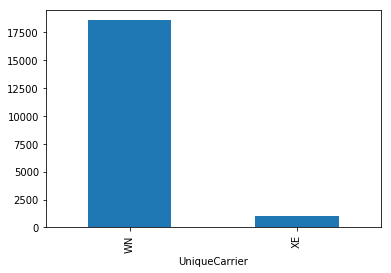

In [25]:
##
## Retrasos por transportador
##
%matplotlib inline
#flights['IsDelayed'] = flights['DepDelay'].copy()
#flights['IsDelayed'] = flights['IsDelayed'].map(lambda x: 1 if x > 15 else 0)
#flights['IsDelayed'] = flights['IsDelayed'].map(lambda x: 0 if np.isnan(x) else x)
(flights.groupby('UniqueCarrier').sum())["IsDelayed"].plot.bar();

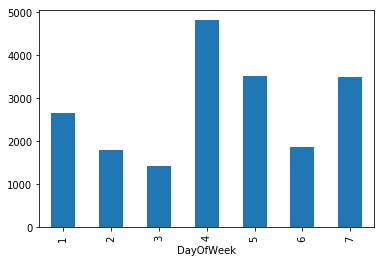

In [26]:

##
## Compute los retrasos por dia de la semana
##
(flights.groupby('DayOfWeek').sum())["IsDelayed"].plot.bar();

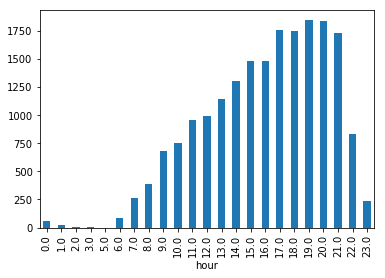

In [27]:
##
## Compute los retrasos por hora del dia
##
flights['hour'] = flights['DepTime'].copy()
flights['hour'] = flights['hour'].map(lambda x: int(x/100) if not np.isnan(x) else x)
(flights.groupby('hour').sum())["IsDelayed"].plot.bar();